## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice before cleaning data
Num_mice = merge_df.loc[:,"Mouse ID"]
DNum = Num_mice.drop_duplicates()
CDNum = DNum.count()
print (CDNum)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Dup_mice = merge_df.loc[merge_df.duplicated(subset = ["Mouse ID","Timepoint"]),("Mouse ID")].unique()
print (Dup_mice)

['g989']


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Drop_dup = pd.DataFrame(merge_df[merge_df["Mouse ID"].isin(Dup_mice)==False])
Drop_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
Final_count = len(Drop_dup["Mouse ID"].unique())
print (Final_count)

248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Drug_group = Drop_dup.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean_drug = Drug_group["Tumor Volume (mm3)"].mean()
Median_drug = Drug_group["Tumor Volume (mm3)"].median()
Variance_drug = Drug_group["Tumor Volume (mm3)"].var()
Standard_drug = Drug_group["Tumor Volume (mm3)"].std()
SEM_drug = Drug_group["Tumor Volume (mm3)"].sem()

# I prefer this way to get the variables, because I can pull individual variables quicker
# Assemble the resulting series into a single summary dataframe.
Summary_df = pd.DataFrame({"Mean": Mean_drug, "Median": Median_drug,
                          "Variance": Variance_drug, "Standard Error": Standard_drug,
                          "SEM": SEM_drug})
Summary_df

,Mean,Median,Variance,Standard Error,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line:
#use Drop_dup dataframe, sort by drug regimen, then use aggregate function
Agg_df = Drop_dup.groupby("Drug Regimen").aggregate(["mean", "median","std","var","sem"])["Tumor Volume (mm3)"]
Agg_df
#This is a much quicker way to get the statistics but I don't prefer the column titles being lower case

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Timepoints')

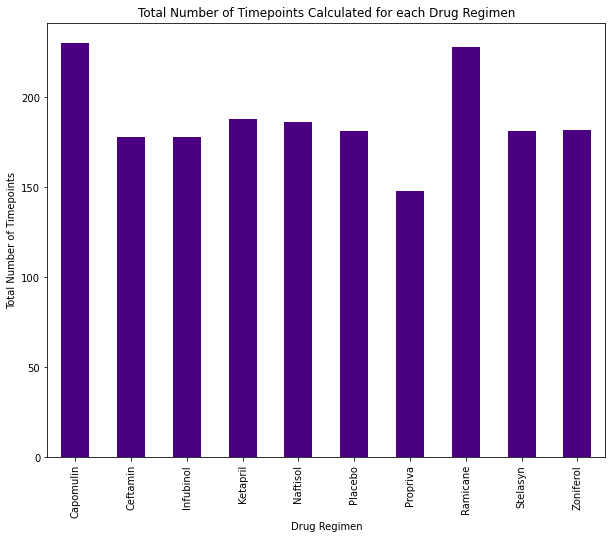

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Sort by drug regimen then get the total count of all timepoints 
Time_init = Drop_dup.groupby("Drug Regimen").count()["Timepoint"]
Pandas_graph = Time_init.plot.bar(color="indigo",figsize = (10,8))
plt.title("Total Number of Timepoints Calculated for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

<BarContainer object of 10 artists>

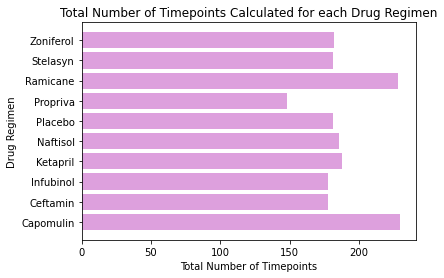

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
X_axis = np.arange(len(Time_init))
Graph = plt.barh(X_axis, Time_init, color = "plum", align = "center")
Tick_loc = [value for value in X_axis]
DR = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.yticks(Tick_loc, DR)
plt.xlabel("Total Number of Timepoints")
plt.ylabel ("Drug Regimen")
plt.title ("Total Number of Timepoints Calculated for each Drug Regimen")
Graph
# I made a horizontal Bar graph because I was having issues with the labels in the X axis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F346567EF0>],
      dtype=object)

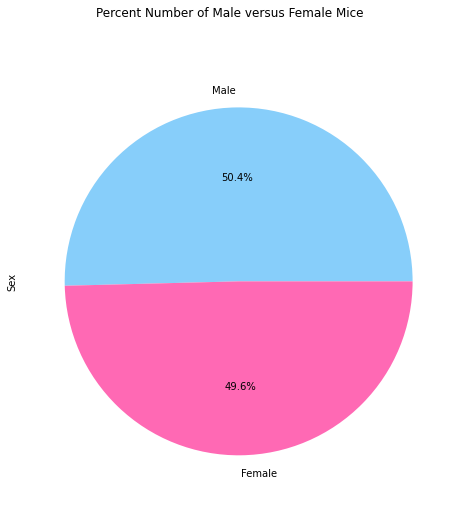

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender = Drop_dup.loc[:,["Sex","Mouse ID"]]
Drop_gen = Gender.drop_duplicates(subset = "Mouse ID")
Tot_gen = Drop_gen["Sex"].value_counts()
Gen_graph = Tot_gen.plot.pie(subplots=True, autopct = "%1.1f%%",
                             colors=["lightskyblue","hotpink"], title = "Percent Number of Male versus Female Mice",
                            figsize = (10,8))
Gen_graph


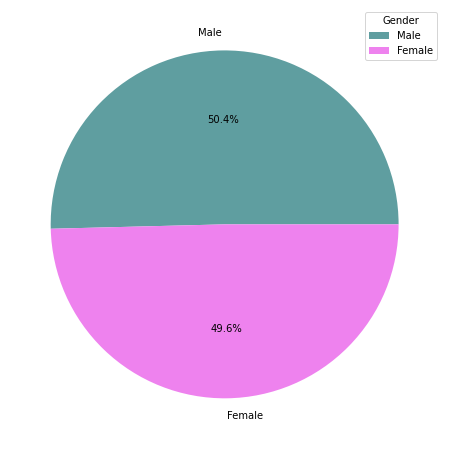

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots(figsize=(10,8))
Y_axis = np.array(Tot_gen)
Lab_Y = ["Male","Female"]
Colors = ["cadetblue", "violet"]
plt.pie(Y_axis, labels = Lab_Y, colors = Colors, autopct = "%1.1f%%")
plt.legend(title = "Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#Going to use callable function as explained in https://towardsdatascience.com/how-to-use-loc-in-pandas-49ed348a4117

Capomulin_init = Drop_dup.loc[Drop_dup["Drug Regimen"]=="Capomulin",:]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_t = Capomulin_init.groupby("Mouse ID").max()["Timepoint"]
Capomulin_df = pd.DataFrame(Capomulin_t)
Capomulin_merge = pd.merge(Capomulin_df, Drop_dup, on = ("Mouse ID","Timepoint"))
Capomulin_merge.head()

#I was struggling here because I kept putting my Drop_dup df first which was skewing my numbers, I didn't realize
#something as simple as rearranging the dfs would have such a huge impact

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [13]:
Ramicane_init = Drop_dup.loc[Drop_dup["Drug Regimen"]=="Ramicane",:]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_t = Ramicane_init.groupby("Mouse ID").max()["Timepoint"]
Ramicane_df = pd.DataFrame(Ramicane_t)
Ramicane_merge = pd.merge(Ramicane_df, Drop_dup, on = ("Mouse ID","Timepoint"))

In [14]:
Infubinol_init = Drop_dup.loc[Drop_dup["Drug Regimen"]=="Infubinol",:]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_t = Infubinol_init.groupby("Mouse ID").max()["Timepoint"]
Infubinol_df = pd.DataFrame(Infubinol_t)
Infubinol_merge = pd.merge(Infubinol_df, Drop_dup, on = ("Mouse ID","Timepoint"))

In [15]:
Ceftamin_init = Drop_dup.loc[Drop_dup["Drug Regimen"]=="Ceftamin",:]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_t = Ceftamin_init.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_df = pd.DataFrame(Ceftamin_t)
Ceftamin_merge = pd.merge(Ceftamin_df, Drop_dup, on = ("Mouse ID","Timepoint"))

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
Capomulin_list = Capomulin_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_quart = round(Capomulin_list.quantile([0.25,0.5,0.75]),2)
Cap_low = round(Capomulin_quart[0.25],2)
Cap_high = round(Capomulin_quart[0.75],2)
Cap_iqr = round(Cap_high-Cap_low,2)    
Cap_lbound = round(Cap_low - (1.5*Cap_iqr),2)
Cap_ubound = round(Cap_high - (1.5*Cap_iqr),2)

    # Determine outliers using upper and lower bounds
print(f"The lower quartile of Capomulin Tumor Volume is: {Cap_low}")
print(f"The upper quartile of Capomulin Tumor Volume is: {Cap_high}")
print(f"The interquartile range of Capomulin Tumor Volume is: {Cap_iqr}")
print(f"The the median of Capomulin Tumor Volume is: {Capomulin_quart[0.5]} ")
print(f"Values below {Cap_lbound} could be outliers.")
print(f"Values above {Cap_ubound} could be outliers.")

The lower quartile of Capomulin Tumor Volume is: 32.38
The upper quartile of Capomulin Tumor Volume is: 40.16
The interquartile range of Capomulin Tumor Volume is: 7.78
The the median of Capomulin Tumor Volume is: 38.13 
Values below 20.71 could be outliers.
Values above 28.49 could be outliers.


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
Ramicane_list = Ramicane_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Ramicane_quart = round(Ramicane_list.quantile([0.25,0.5,0.75]),2)
Ram_low = round(Ramicane_quart[0.25],2)
Ram_high = round(Ramicane_quart[0.75],2)
Ram_iqr = round(Ram_high-Ram_low,2)    
Ram_lbound = round(Ram_low - (1.5*Ram_iqr),2)
Ram_ubound = round(Ram_high - (1.5*Ram_iqr),2)

    # Determine outliers using upper and lower bounds
print(f"The lower quartile of Capomulin Tumor Volume is: {Ram_low}")
print(f"The upper quartile of Capomulin Tumor Volume is: {Ram_high}")
print(f"The interquartile range of Capomulin Tumor Volume is: {Ram_iqr}")
print(f"The the median of Capomulin Tumor Volume is: {Ramicane_quart[0.5]} ")
print(f"Values below {Ram_lbound} could be outliers.")
print(f"Values above {Ram_ubound} could be outliers.")

The lower quartile of Capomulin Tumor Volume is: 31.56
The upper quartile of Capomulin Tumor Volume is: 40.66
The interquartile range of Capomulin Tumor Volume is: 9.1
The the median of Capomulin Tumor Volume is: 36.56 
Values below 17.91 could be outliers.
Values above 27.01 could be outliers.


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
Infubinol_list = Infubinol_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Infubinol_quart = round(Infubinol_list.quantile([0.25,0.5,0.75]),2)
Inf_low = round(Infubinol_quart[0.25],2)
Inf_high = round(Infubinol_quart[0.75],2)
Inf_iqr = round(Inf_high-Inf_low,2)    
Inf_lbound = round(Inf_low - (1.5*Inf_iqr),2)
Inf_ubound = round(Inf_high - (1.5*Inf_iqr),2)

    # Determine outliers using upper and lower bounds
print(f"The lower quartile of Capomulin Tumor Volume is: {Inf_low}")
print(f"The upper quartile of Capomulin Tumor Volume is: {Inf_high}")
print(f"The interquartile range of Capomulin Tumor Volume is: {Inf_iqr}")
print(f"The the median of Capomulin Tumor Volume is: {Infubinol_quart[0.5]} ")
print(f"Values below {Inf_lbound} could be outliers.")
print(f"Values above {Inf_ubound} could be outliers.")

The lower quartile of Capomulin Tumor Volume is: 54.05
The upper quartile of Capomulin Tumor Volume is: 65.53
The interquartile range of Capomulin Tumor Volume is: 11.48
The the median of Capomulin Tumor Volume is: 60.17 
Values below 36.83 could be outliers.
Values above 48.31 could be outliers.


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
Ceftamin_list = Ceftamin_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Ceftamin_quart = round(Ceftamin_list.quantile([0.25,0.5,0.75]),2)
Cef_low = round(Ceftamin_quart[0.25],2)
Cef_high = round(Ceftamin_quart[0.75],2)
Cef_iqr = round(Cef_high-Cef_low,2)    
Cef_lbound = round(Cef_low - (1.5*Cef_iqr),2)
Cef_ubound = round(Cef_high - (1.5*Cef_iqr),2)

    # Determine outliers using upper and lower bounds
print(f"The lower quartile of Capomulin Tumor Volume is: {Cef_low}")
print(f"The upper quartile of Capomulin Tumor Volume is: {Cef_high}")
print(f"The interquartile range of Capomulin Tumor Volume is: {Cef_iqr}")
print(f"The the median of Capomulin Tumor Volume is: {Ceftamin_quart[0.5]} ")
print(f"Values below {Cef_lbound} could be outliers.")
print(f"Values above {Cef_ubound} could be outliers.")

The lower quartile of Capomulin Tumor Volume is: 48.72
The upper quartile of Capomulin Tumor Volume is: 64.3
The interquartile range of Capomulin Tumor Volume is: 15.58
The the median of Capomulin Tumor Volume is: 59.85 
Values below 25.35 could be outliers.
Values above 40.93 could be outliers.


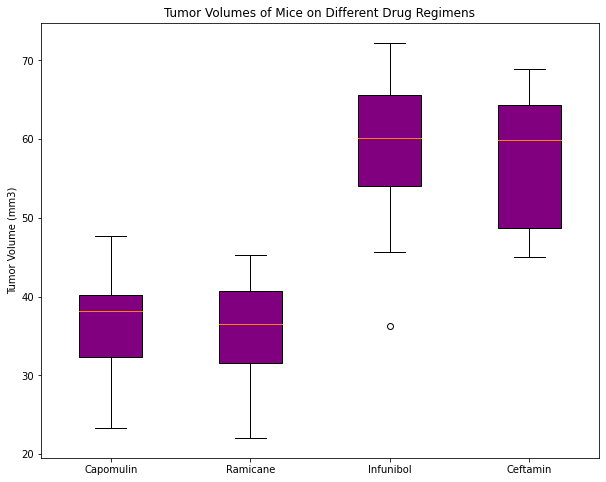

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Got a lot of helpful information from https://blog.finxter.com/matplotlib-boxplot/
Regimen = ["Capomulin","Ramicane","Infunibol","Ceftamin"]
Lists = [Capomulin_list, Ramicane_list, Infubinol_list, Ceftamin_list]
fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.set_title("Tumor Volumes of Mice on Different Drug Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(Lists, labels = Regimen, patch_artist = True, boxprops=dict(facecolor = "purple"))
plt.show()

## Line and Scatter Plots

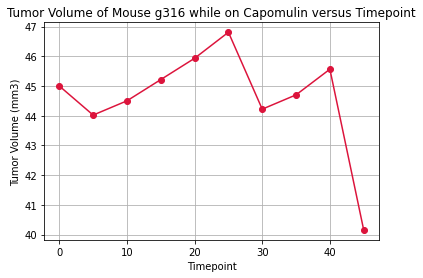

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Using callable function we will pinpoint a specific mouse
Capomulin_volume = Capomulin_init.loc[Capomulin_init["Mouse ID"]=="g316",:]
X_axis = Capomulin_volume["Timepoint"]
Y_axis = Capomulin_volume["Tumor Volume (mm3)"]
plt.plot(X_axis,Y_axis, color = "crimson", marker = "o")
plt.title('Tumor Volume of Mouse g316 while on Capomulin versus Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()
Capomulin_volume

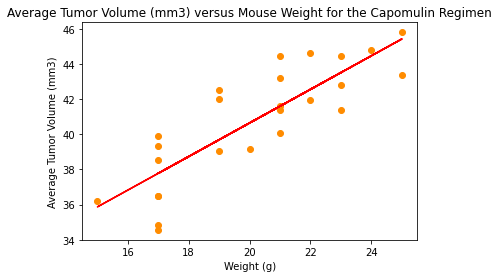

The linear regression equation is y = 0.95x + 21.55


In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#This graph was harder to do, I don't think I got the correct values for the weight
Weight = Capomulin_init.groupby("Mouse ID")["Weight (g)"].mean()
Avg_tum = Capomulin_init.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(Weight, Avg_tum, marker = "o", facecolor = "darkorange")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight, Avg_tum)
regress_values = Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Weight,regress_values,"r-")
plt.title("Average Tumor Volume (mm3) versus Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
print ("The linear regression equation is " + line_eq)

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#See above graph for linear regression line 
Correlation = st.pearsonr(Weight, Avg_tum)
print(f"The correlation between both factors is {round(Correlation[0],2)}")

The correlation between both factors is 0.84
